Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [6]:
NAME = "Juan Mario Sosa Romo"

---

<div class="alert alert-success">

# Objetivos

El propósito de este ejercicio es que refuerces tus conocimientos sobre detección de anomalías

In [7]:
# Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from macti.eval import *

In [8]:
quiz = Quiz('1', 'mdp')

In [9]:
# Desviación estándar
# Conjunto ficticio con distribución normal
np.random.seed(0)
datos = np.random.randn(50000) * 20 + 20

In [18]:
def anomalias_std(datos, corte=3):
    """
    Función para obtener las anomalías con base en la desviación estándar
    params  :
    ---------
    datos : arreglo de numpy con los datos en los que se buscarán anomalías
    corte : entero, número que multiplica a la desviación estándar para las anomalías
            por omisión tiene valor de 3
    devuelve:
    ---------
    - anom     : arreglo 1D de numpy con los valores anomálos
    - anom_ind : arreglo 1D de numpy con los índices de los valores anomálos
    """
    std = np.std(datos)
    mean = np.mean(datos)
    anom_ind = np.where((datos<mean-std*corte)|(datos>mean+std*corte))  
    anom = datos[anom_ind]   
    
    return anom, anom_ind

anom_std, ind_std = anomalias_std(datos)
tot_std = len(anom_std)
print(tot_std)

148


In [19]:
quiz.eval_numeric('1', tot_std)

――――――――――――――――――――――――――――――――――――――――
1 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [20]:
# Rango intercuartil
# Conjunto ficticio con distribución normal
np.random.seed(0)
datos = np.random.randn(50000) * 20 + 20

In [21]:
def anomalias_iqr(datos):
    """ 
    Función para obtener las anomalías con base en el rango intercuartil
    params  :
    ---------
    datos : arreglo de numpy con los datos en los que se buscarán anomalías
    devuelve:
    ---------
    - anom     : arreglo de numpy con los valores anomálos
    - anom_ind : arreglo de numpy con los índices de los valores anomálos
    """
    Q1, Q3 = np.percentile(datos, [25,75])
    IQR = Q3 - Q1
    anom_ind = np.where((datos < Q1-1.5*IQR)|(datos> Q3+1.5*IQR))
    anom = datos[anom_ind]
    return anom, anom_ind

anom_iqr, ind_iqr = anomalias_iqr(datos)
tot_iqr = len(anom_iqr)
print(tot_iqr)

379


In [25]:
quiz.eval_numeric('2', tot_iqr)

――――――――――――――――――――――――――――――――――――――――
2 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


In [1]:
# Repaso EllipticEnvelope con datos 3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
# 4 nubes de puntos de 3D con alta varianza
X, y = make_blobs(n_samples=500,n_features=3,centers=4,cluster_std=[5]*4,random_state=42)

In [2]:
# Genera un objeto de EllipticEnvelope con valor para reproducir de 42
# ajusta y obtén la predicción para el conjunto X
# almacena los índices de los valores anómalos e imprime el conteo de los mismos
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(random_state=42)
ee.fit(X)                        # hacemos que el modelo se entrene con los datos
anom = ee.predict(X)             # anom nos regresa un array de (n,1) marcando -1 los anomalos
ind_ee = np.where(anom==-1)[0]   # el array 
anom_ee = X[ind_ee]
tot_ee = len(ind_ee)
print(tot_ee)

50


In [39]:
quiz.eval_numeric('3', tot_ee)

――――――――――――――――――――――――――――――――――――――――
3 | Tu resultado es correcto.
――――――――――――――――――――――――――――――――――――――――


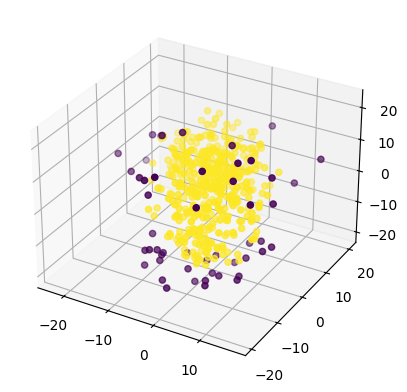

In [3]:
# Gráfica con el resultado
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X[:,0], X[:,1], X[:,2], c=anom)
plt.show()

In [4]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2],
                    color=anom)
fig.show()